# 📚 Introdução ao Bootstrapping em Estatística

##🎯 Objetivo

Compreender o que é bootstrapping, por que e quando usá-lo, e como ele se diferencia de métodos tradicionais paramétricos e não-paramétricos.

##🔍 O que é Bootstrapping?

Bootstrapping é um método estatístico de reamostragem com reposição. Ele permite:

* Estimar erros-padrão 🧮
* Construir intervalos de confiança 📏
* Realizar testes de hipóteses sem depender de distribuições teóricas 🎲

Ideia principal: simular várias amostras de uma única amostra real, para entender como a estatística (ex: média) varia de amostra para amostra.

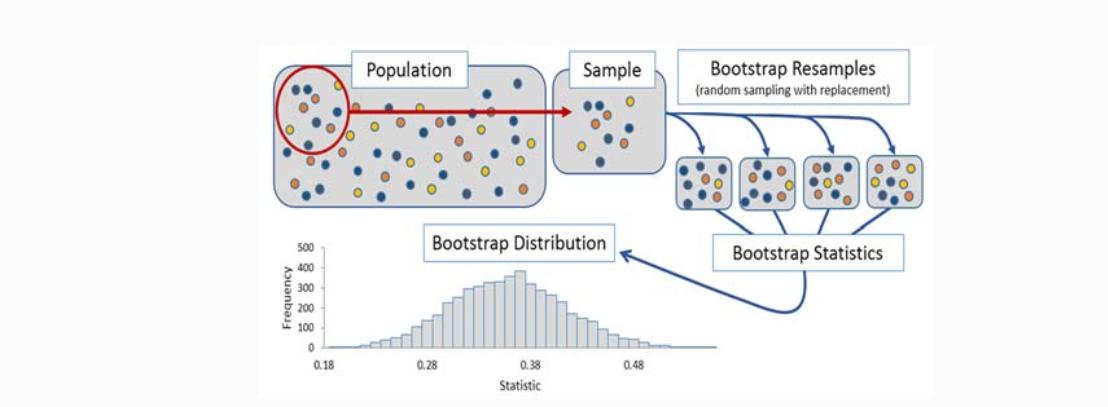

## 🆚 Diferença entre Bootstrapping e Testes Paramétricos/Não Paramétricos

| Critério                     | Paramétrico              | Não Paramétrico             | Bootstrapping                        |
|-----------------------------|--------------------------|-----------------------------|--------------------------------------|
| Suposição de distribuição   | Sim (ex: normalidade)    | Não                         | Não precisa                          |
| Usa fórmulas                | Sim                      | Não                         | Não, usa simulação                   |
| Robusto para pequenas amostras | Nem sempre           | Sim                         | Sim                                  |
| Exemplo                     | Teste t, ANOVA           | Mann-Whitney, Wilcoxon      | Intervalo de confiança, bootstrap    |


❗Todos usam a mesma lógica: inferir algo sobre a população com base na amostra. A diferença está em como enxergam a variabilidade da amostra.

Imagine que você quer saber qual é a média real de colesterol de uma população, mas só tem uma amostra de 30 pacientes. Como você pode confiar nessa média?

#### 🧪 Métodos Paramétrico: "Se os dados são assim, a média se comporta assim."

* Você pressupõe que os dados seguem uma distribuição conhecida (normal, por exemplo).
* Usa fórmulas derivadas da teoria estatística para dizer: “Se a média dos dados é X e o desvio padrão é Y, então a verdadeira média da população está provavelmente entre A e B.”

* Exemplo mental: “Já sei como as médias se comportam em dados normais. Basta encaixar sua amostra nessa teoria.”

* Usa: média, variância, distribuição t ou z.

#### 📉 Não Paramétrico: "Não sei como são os dados, mas posso usar ordens e posições."

* Você não faz suposições sobre a forma da distribuição.
* Em vez de usar médias e desvios, você compara as posições dos valores (ranks). Serve bem quando os dados são assimétricos, têm outliers ou não podem ser transformados em algo próximo do normal.
* Exemplo mental: “Não me importa se a distribuição é normal ou não. Só quero saber quem é maior ou menor.”
* Usa: mediana, ranks, sinais.



#### 🥾 Bootstrapping: "E se eu repetisse esse experimento milhares de vezes com esses mesmos dados?"

* Você simula milhares de novos conjuntos de dados (com reposição) a partir da sua amostra.
* Cria uma distribuição empírica das médias (ou outra estatística) e observa diretamente onde ela varia. Não pressupõe forma alguma: nem normalidade, nem simetria, nem homogeneidade.
* Exemplo mental: “Minha amostra é tudo o que eu tenho. E se eu a sorteasse de novo e de novo? O que aconteceria com a média?”
* Usa: reamostragem aleatória, histogramas, percentis.

##🔧 Como Funciona o Bootstrapping (passo a passo)

* Comece com uma amostra original (ex: 30 medidas de glicemia)
* Reamostre com reposição para gerar uma nova amostra de mesmo tamanho (ex: 30 valores escolhidos aleatoriamente com reposição)
* Calcule a estatística desejada (ex: média da nova amostra)
* Repita centenas ou milhares de vezes (ex: 1000 vezes)
* Construa a distribuição das estatísticas (ex: histograma das médias)
* Use os percentis para obter intervalos de confiança (ex: 2,5% a 97,5%)

In [4]:
import numpy as np
from scipy.stats import bootstrap

In [6]:
#Dados originais (exemplo)
data = np.array([1, 2, 2, 3, 4, 4, 4, 5, 5, 6])

In [7]:
#Conveter o array em uma sequencia
data = (data,)

In [8]:
#Função para bootstrapping da média
bootstrap_ci = bootstrap(data, np.median, confidence_level=0.95,
                         random_state=1, method='percentile')

In [12]:
print(bootstrap_ci.standard_error , bootstrap_ci.confidence_interval)

0.6787624483750025 ConfidenceInterval(low=np.float64(2.0), high=np.float64(5.0))


##💡 Benefícios do Bootstrapping

* Não exige normalidade dos dados
* Pode ser usado com amostras pequenas
* Aplica-se a diversas estatísticas: média, mediana, moda, desvio-padrão, etc.
* Útil quando não há fórmulas matemáticas para a estatística desejada

##⚠️ Limitações

* Demanda computacional (muitas reamostragens)
* Requer que a amostra original represente bem a população

##🧠 Quando Usar Bootstrapping?

* Quando você tem uma única amostra e quer inferências robustas
* Quando os testes clássicos não são confiáveis (ex: distribuição enviesada)
*Quando está estudando estatísticas não tradicionais (ex: mediana de diferenças absolutas)

##📌 Conclusão

O Bootstrapping é uma ferramenta poderosa, flexível e intuitiva que permite realizar inferências estatísticas sem as suposições fortes dos testes clássicos. Com ele, você substitui equações por simulações, e distribuições teóricas por experimentos computacionais.